In [1]:
# load packages
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

## Visualize key macroeconomic data

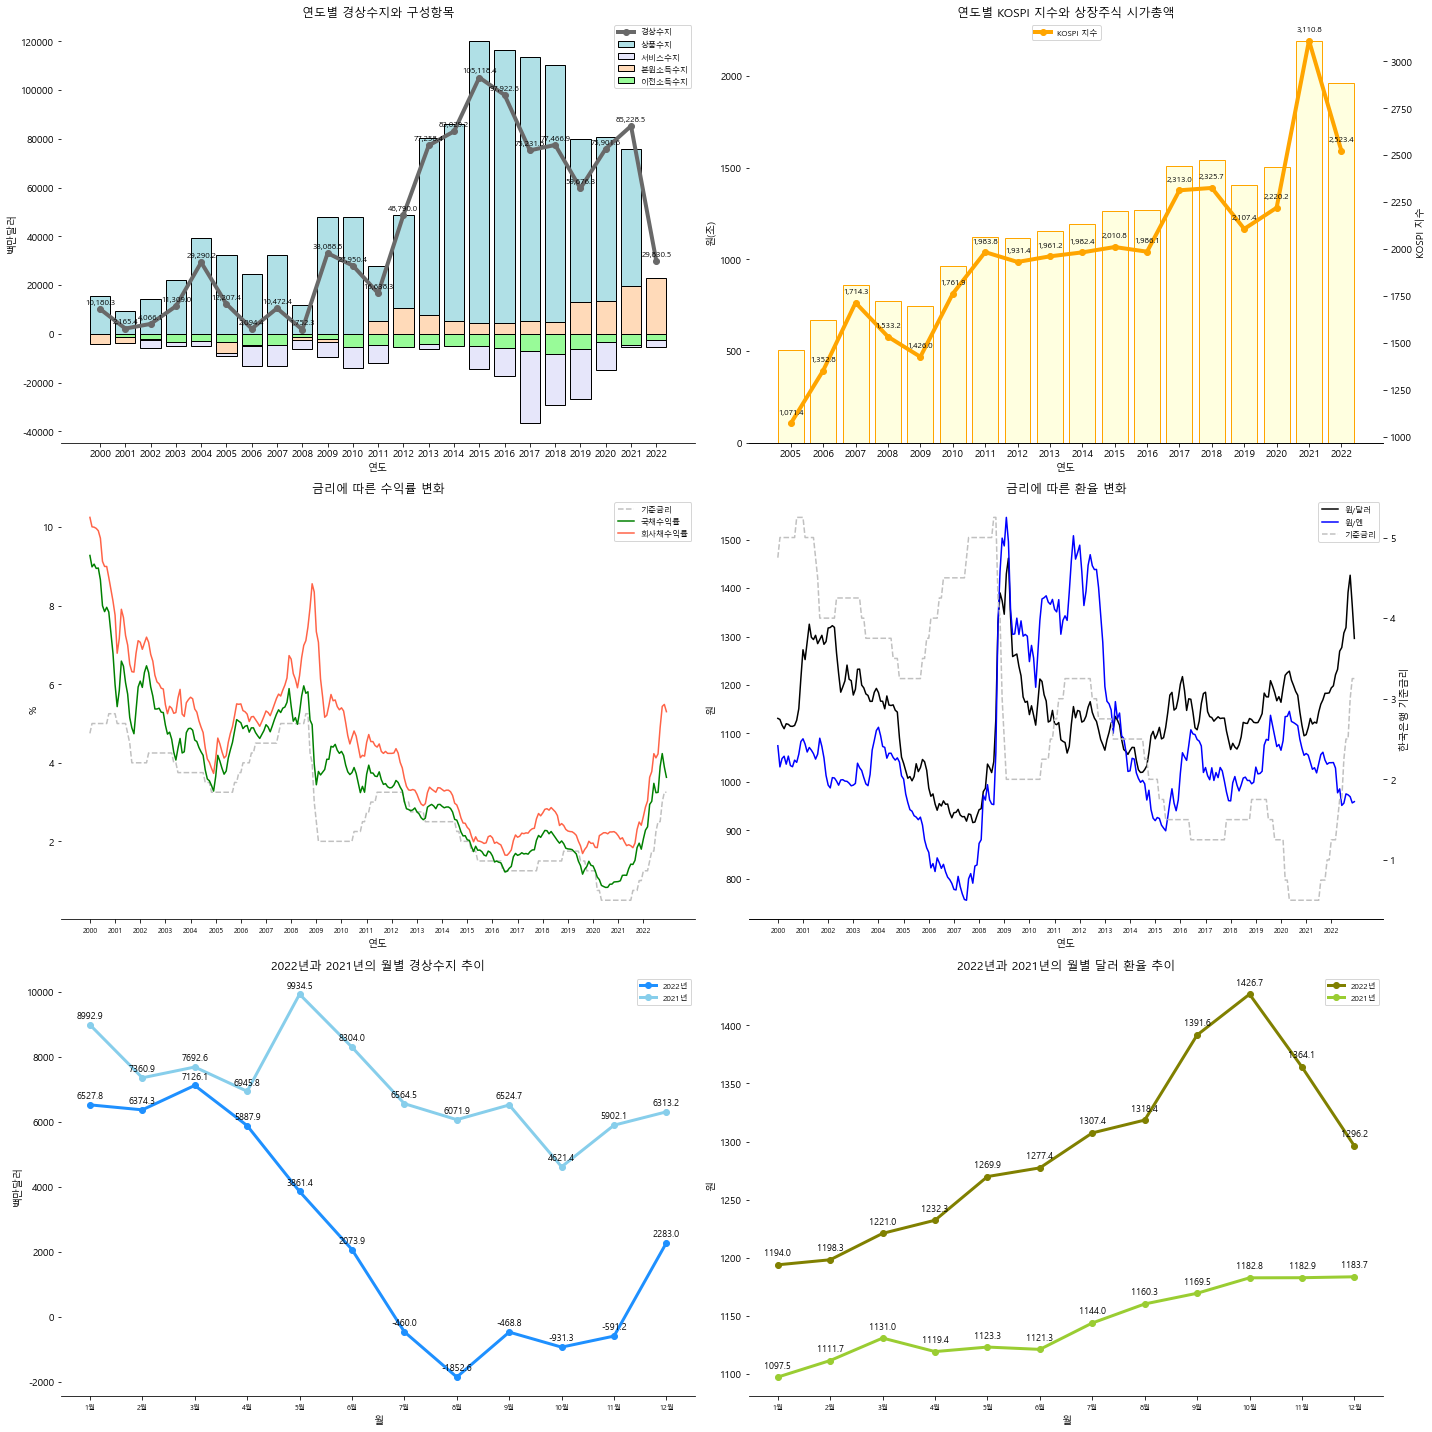

In [2]:
# load data
balance = np.genfromtxt('경상수지.csv', delimiter = ',', encoding = 'UTF8', dtype = 'float', skip_header = 1)
kospi = np.genfromtxt('KOSPI 지수.csv', delimiter = ',', encoding = 'UTF8', dtype = 'float', skip_header = 1)
national = np.genfromtxt('국고채.csv', delimiter = ',', encoding = 'UTF8', dtype = 'float', skip_header = 1)
stock = np.genfromtxt('상장주식 시가총액.csv', delimiter = ',', encoding = 'UTF8', dtype = 'float', skip_header = 1)
key_rate = np.genfromtxt('한국은행 기준금리.csv', delimiter = ',', encoding = 'UTF8', dtype = 'float', skip_header = 1)
exchange_rate = np.genfromtxt('환율.csv', delimiter = ',', encoding = 'UTF8', dtype = 'float', skip_header = 1)
company = np.genfromtxt('회사채.csv', delimiter = ',', encoding = 'UTF8', dtype = 'float', skip_header = 1)

# delete NA
balance = balance[:, 1:]
kospi = kospi[1:]
national = national[1:]
stock = stock[:, 1:]
key_rate = key_rate[1:]
exchange_rate = exchange_rate[:, 1:]
company = company[2:]

# reverse array
exchange_rate = exchange_rate[:, ::-1]
key_rate = key_rate[::-1]
kospi = kospi[::-1]
stock = stock[:, ::-1]
national = national[::-1]
company = company[::-1]
balance = balance[:, ::-1]
year = np.array(range(2000, 2023))


# 한글 깨짐 해결
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 시각화
fig, axes = plt.subplots(3, 2, figsize=(20, 20))


# 연도별 상품수지 합
goods = []
for i in range(int(len(balance[0]) / 12)):
    goods.append(np.sum(balance[0][12 * i: 12 * i + 12]))   
# 연도별 서비스수지 합
service = []
for i in range(int(len(balance[1]) / 12)):
    service.append(np.sum(balance[1][12 * i: 12 * i + 12]))
# 연도별 본원소득수지 합
income = []
for i in range(int(len(balance[2]) / 12)):
    income.append(np.sum(balance[2][12 * i: 12 * i + 12]))
# 연도별 이전소득수지 합
transfer = []
for i in range(int(len(balance[3]) / 12)):
    transfer.append(np.sum(balance[3][12 * i: 12 * i + 12]))
# 연도별 경상수지 합
balance_month = []
for i in range(int(len(balance[4]) / 12)):
    balance_month.append(np.sum(balance[4][12 * i: 12 * i + 12]))
# 연도별 경상수지와 구성항목: bar plot
axes[0, 0].bar(np.arange(0, len(goods)), goods, color = "powderblue", label = "상품수지", edgecolor = "black")
axes[0, 0].bar(np.arange(0, len(service)), service, color = "lavender", label = "서비스수지", edgecolor = "black")
axes[0, 0].bar(np.arange(0, len(income)), income, color = "peachpuff", label = "본원소득수지", edgecolor = "black")
axes[0, 0].bar(np.arange(0, len(transfer)), transfer, color = "palegreen", label = "이전소득수지", edgecolor = "black")
axes[0, 0].plot(balance_month, color = "dimgray", linewidth = 4, marker = 'o', label = "경상수지")
axes[0, 0].legend(prop = {'size': 8})   # add legend
axes[0, 0].set_title("연도별 경상수지와 구성항목")   # add title
axes[0, 0].set_xlabel("연도")   # add labels
axes[0, 0].set_ylabel("백만달러")
axes[0, 0].spines["top"].set_visible(False)   # remove top border
axes[0, 0].spines["right"].set_visible(False)   # remove right border
axes[0, 0].spines["left"].set_visible(False)   # remove left border
axes[0, 0].set_xticks(np.arange(0, len(balance_month)))   # change x-axis
axes[0, 0].set_xticklabels(year)
for i, v in enumerate(balance_month):   # display values
    axes[0, 0].text(i, v + 2000, '{:,}'.format(round(v, 1)), color = 'black', size = 8, horizontalalignment = 'center')


# 연도별 KOSPI 지수와 상장주식 시가총액    
stock_average = []
for i in range(int(len(stock[0]) / 12)):
    stock_average.append(np.mean(stock[0][12 * i: 12 * i + 12]))
stock_average = np.array(stock_average)
kospi_average = []
kospi_2005 = kospi[12 * 5 - 1:]   # 상장주식이 2005년부터 있으므로 kospi 지수도 2005년 이후만 고려
for i in range(int(len(kospi_2005) / 12)):
    # print(i)
    kospi_average.append(np.mean(kospi_2005[12 * i: 12 * i + 12]))
axes[0, 1].bar(np.arange(0, len(stock_average)), stock_average / 1e9, color = "lightyellow", edgecolor = "orange")
axes[0, 1].set_title("연도별 KOSPI 지수와 상장주식 시가총액")
axes[0, 1].set_xlabel("연도")
axes[0, 1].set_ylabel("원(조)")
axes[0, 1].spines["top"].set_visible(False)
axes[0, 1].spines["right"].set_visible(False)
axes[0, 1].spines["left"].set_visible(False)
axes[0, 1].set_xticks(np.arange(0, len(stock_average)))
axes[0, 1].set_xticklabels(year[5:])
axes2 = axes[0, 1].twinx()   # y-axis with different scale
axes2.plot(np.arange(0, len(kospi_average)), kospi_average, color = "orange", linewidth = 4, marker = 'o', label = "KOSPI 지수")
axes2.set_ylabel("KOSPI 지수")
axes2.legend(loc = 'upper center', prop = {'size': 8})
axes2.spines["top"].set_visible(False)
axes2.spines["right"].set_visible(False)
axes2.spines["left"].set_visible(False)
for i, v in enumerate(kospi_average):
    axes2.text(i, v + 50, '{:,}'.format(round(v, 1)), color = 'black', size = 8, horizontalalignment = 'center')


# 금리에 따른 수익률 변화: 꺾은선 그래프
axes[1, 0].plot(key_rate, color = "silver", label = "기준금리", linestyle = 'dashed')
axes[1, 0].plot(national, color = "green", label = "국채수익률")
axes[1, 0].plot(company, color = "tomato", label = "회사채수익률")
axes[1, 0].legend(prop = {'size': 8})
axes[1, 0].set_title("금리에 따른 수익률 변화")
axes[1, 0].set_xlabel("연도")
axes[1, 0].set_ylabel("%")
axes[1, 0].spines["top"].set_visible(False)
axes[1, 0].spines["right"].set_visible(False)
axes[1, 0].spines["left"].set_visible(False)
axes[1, 0].set_xticks(np.arange(0, 276, step = 12))
axes[1, 0].set_xticklabels(year, size = 7)


# 금리에 따른 환율 변화: 꺾은선 그래프
axes[1, 1].plot(exchange_rate[0], color = "black", label = "원/달러")
axes[1, 1].plot(exchange_rate[1], color = "blue", label = "원/엔")
axes[1, 1].set_title("금리에 따른 환율 변화")
axes[1, 1].set_xlabel("연도")
axes[1, 1].set_ylabel("원")
axes[1, 1].spines["top"].set_visible(False)
axes[1, 1].spines["right"].set_visible(False)
axes[1, 1].spines["left"].set_visible(False)
axes[1, 1].set_xticks(np.arange(0, 276, step = 12))
axes[1, 1].set_xticklabels(year, size = 7)
axes2 = axes[1, 1].twinx()   # y-axis with different scale
axes2.plot(key_rate, color = "silver", linestyle = 'dashed', label = "기준금리")
axes[1, 1].plot(np.nan, color = "silver", linestyle = 'dashed', label = "기준금리")
axes[1, 1].legend(prop = {'size': 8})
axes2.spines["top"].set_visible(False)
axes2.spines["right"].set_visible(False)
axes2.spines["left"].set_visible(False)
axes2.set_ylabel("한국은행 기준금리")


# 2022년과 2021년의 월별 경상수지 추이
axes[2, 0].plot(balance[4][-12:], linewidth = 3, color = "dodgerblue", label = "2022년", marker = 'o')
axes[2, 0].plot(balance[4][-12 * 2:-12 * 2 + 12], linewidth = 3, color = "skyblue", label = "2021년", marker = 'o')
axes[2, 0].legend(prop = {'size': 8})
axes[2, 0].set_title("2022년과 2021년의 월별 경상수지 추이")
axes[2, 0].set_xlabel("월")
axes[2, 0].set_ylabel("백만달러")
axes[2, 0].spines["top"].set_visible(False)
axes[2, 0].spines["right"].set_visible(False)
axes[2, 0].spines["left"].set_visible(False)
axes[2, 0].set_xticks(np.arange(0, 12, step = 1))
axes[2, 0].set_xticklabels(["1월", "2월", "3월", "4월", "5월", "6월", "7월", "8월", "9월", "10월", "11월", "12월"], size = 7)
for i, v in enumerate(balance[4][-12:]):
    axes[2, 0].text(i, v + 200, round(v, 1), color = 'black', size = 9, horizontalalignment = 'center')
for i, v in enumerate(balance[4][-12 * 2:-12 * 2 + 12]):
    axes[2, 0].text(i, v + 200, round(v, 1), color = 'black', size = 9, horizontalalignment = 'center')
    

# 2022년과 2021년의 월별 달러 환율 추이
axes[2, 1].plot(exchange_rate[0][-12:], linewidth = 3, color = "olive", label = "2022년", marker = 'o')
axes[2, 1].plot(exchange_rate[0][-12 * 2:-12 * 2 + 12], linewidth = 3, color = "yellowgreen", label = "2021년", marker = 'o')
axes[2, 1].legend(prop = {'size': 8})
axes[2, 1].set_title("2022년과 2021년의 월별 달러 환율 추이")
axes[2, 1].set_xlabel("월")
axes[2, 1].set_ylabel("원")
axes[2, 1].spines["top"].set_visible(False)
axes[2, 1].spines["right"].set_visible(False)
axes[2, 1].spines["left"].set_visible(False)
axes[2, 1].set_xticks(np.arange(0, 12, step = 1))
axes[2, 1].set_xticklabels(["1월", "2월", "3월", "4월", "5월", "6월", "7월", "8월", "9월", "10월", "11월", "12월"], size = 7)
for i, v in enumerate(exchange_rate[0][-12:]):
    axes[2, 1].text(i, v + 8, round(v, 1), color = 'black', size = 9, horizontalalignment = 'center')
for i, v in enumerate(exchange_rate[0][-12 * 2:-12 * 2 + 12]):
    axes[2, 1].text(i, v + 8, round(v, 1), color = 'black', size = 9, horizontalalignment = 'center')

plt.tight_layout()
plt.show()

In [4]:
plt.savefig('fig.png')

<Figure size 432x288 with 0 Axes>